In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.sparse import dok_matrix
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.linear_model import LinearRegression
from statsmodels.stats._knockoff import RegressionFDR 
from statsmodels import stats

df = pd.read_csv("/Users/cmdb/qbb2020answers2/week7/all_annotated.csv")
print(df)

            t_name gene_name    male_10    male_11    male_12    male_13  \
0      FBtr0114258   CR41571   0.000000   0.000000   0.000000   0.000000   
1      FBtr0346770   CG45784   0.000000   0.000000   0.000000   0.000000   
2      FBtr0302440   CR12798   0.000000   0.000000   0.000000   0.000000   
3      FBtr0302347   CR40182  23.712564  11.967821  20.767498  13.566818   
4      FBtr0346769   CG45783   0.000000   0.000000   0.000000   0.000000   
...            ...       ...        ...        ...        ...        ...   
34713  FBtr0114187   CR40502   0.000000   0.000000   0.000000   0.000000   
34714  FBtr0304147   CR40719   0.000000   0.000000   0.000000   0.000000   
34715  FBtr0114216   CR40679   2.011199   0.000000   7.994137   2.064200   
34716  FBtr0114222   CR40743   0.000000   0.000000   0.000000   0.000000   
34717  FBtr0114283   CR41619   0.000000   0.000000   0.000000   0.000000   

        male_14A   male_14B   male_14C   male_14D  female_10  female_11  \
0       0.00

In [2]:
import seaborn as sns

In [3]:
df["count"] = df.astype(bool).sum(axis=1) -2

df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,count
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,16
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,14
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0


In [4]:
MedExp = pd.DataFrame(df[df["count"]>8].iloc[:,:-1])
MedExp



,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,11.151757,0.391747,4.240487,93.574127,87.244370,22.549498,73.099991,56.537510,41.339439,0.285725,22.376423,93.960289,269.186951,22.976255,32.563301,218.131927
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090


In [5]:
#For columns 2: -2, add 0.1 to the value and then take log2 of each
#This is the main datafram that we use moving forward
logged = MedExp.iloc[:,:2].join(np.log2(MedExp.iloc[:,2:]+0.1)) #.reset_index().iloc[1:,:]
logged



,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.492078,-1.024012,2.117857,6.549579,6.448643,4.501407,6.193772,5.823686,5.372933,-1.374355,4.490341,6.555514,8.073001,4.528337,5.029599,7.769718
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [6]:
cut_logged =logged.iloc[:,2:]
cut_logged


,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,3.492078,-1.024012,2.117857,6.549579,6.448643,4.501407,6.193772,5.823686,5.372933,-1.374355,4.490341,6.555514,8.073001,4.528337,5.029599,7.769718
34663,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
34665,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
34667,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787


In [7]:
#Create clusters of the genes 
genelinked = linkage(logged.iloc[:,2:])
genelinked




array([[1.25900000e+03, 1.26000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.05000000e+03, 2.05100000e+03, 0.00000000e+00, 2.00000000e+00],
       [4.14800000e+03, 4.14900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.69000000e+02, 1.63050000e+04, 1.30783559e+01, 8.15300000e+03],
       [4.68000000e+02, 1.63060000e+04, 1.32621231e+01, 8.15400000e+03],
       [2.56900000e+03, 1.63070000e+04, 1.46562268e+01, 8.15500000e+03]])

In [8]:
#transpose the data in order to cluster the samples
transpose = logged.transpose()
transposed = transpose.astype(object)
transposed



,3,8,9,10,11,12,13,16,37,41,...,34645,34646,34647,34649,34656,34658,34663,34665,34667,34715
t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078964,FBtr0336702,...,FBtr0100866,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114216
gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12582,CG12582,...,mt:ATPase8,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR40679
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,3.46393,2.26279,...,-3.32193,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,1.07806
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,4.23906,0.793853,...,-3.32193,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,4.67025,0.97646,...,-3.32193,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,3.01688
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,4.08372,0.791827,...,-0.664672,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,1.11383
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,4.07881,1.28855,...,1.52549,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,1.69674
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,-3.32193,-3.32193,...,0.489144,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,3.48419,0.292786,...,0.705399,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,0.695194
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,-3.32193,-3.32193,...,-3.32193,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,3.2158


In [9]:
#cluster the samples 
samplelinked = linkage(transposed.iloc[2:,:])

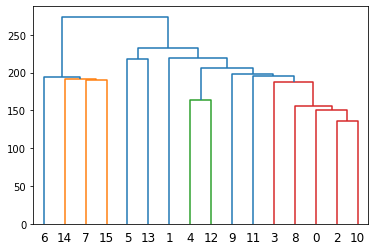

In [10]:
#Create dendrogram of the samples
dendro_samples = dendrogram(samplelinked)

#create dendrogram of the genes
#dendro_genes = dendrogram(genelinked) #jk, this is not possible because too many values

#save this into a file to submit to git

In [11]:
#Get the order of the dendrogram for the genes
bygene=leaves_list(genelinked)
bygene


array([2569,  468,  469, ..., 5392, 2395, 4081], dtype=int32)

In [12]:
#get the order of the dendrogram for the samples 
bysample=leaves_list(samplelinked)
bysample 

array([ 6, 14,  7, 15,  5, 13,  1,  4, 12,  9, 11,  3,  8,  0,  2, 10],
      dtype=int32)

In [13]:
#To-Do
#Create a dicitonary(?) that has the numbers listed 1-8155 with the leaves_list values 
#Re-index the dataframe by looking up the index number and then reordering it by the leaves_list value
#or 
#try reindex function??

#geneclustered = logged.set_index(pd.Index([bygene]))
#geneclustered = array[:, sample_order] #would first need to refer to the index list 

#new plan
#convert my leaves_list output to a list of strings 
#Use
#logged.reindex(new_index)
#and
#pandas.DataFrame.reindex(columns=column_names)


In [14]:
#bygene gives you the order of clustering by one value 
#by sample gives you the order of clustering by the other value 
print(bygene)
print(bysample)


[2569  468  469 ... 5392 2395 4081]
[ 6 14  7 15  5 13  1  4 12  9 11  3  8  0  2 10]


In [15]:
new_index = list()
for i in range(0,8155):
   new_index.append(i)

newer_index = np.array(new_index)



In [16]:
#Plan is to add a new index that just contains the order of the rows
#Then use the "reindex" to reset that index to the leaves list output

gene_index = bygene.tolist()
sample_index = bysample.tolist()
#logged.reindex(columns=sample_index)
cut_logged.set_index(newer_index)
cut_logged.reindex(gene_index)



,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
2569,5.206927,5.529902,1.505031,5.579322,5.899844,6.253538,2.833151,3.403912,5.203159,5.439067,5.407805,5.843629,5.856689,6.054996,6.239900,6.091854
468,2.511593,2.985043,3.191370,2.582402,4.470873,3.195518,-3.321928,3.475454,3.407067,4.673666,3.165305,3.865262,3.932786,2.407218,3.365580,1.200764
469,4.895329,5.484368,4.712538,4.334183,4.495335,4.747560,4.756992,5.241269,4.863711,5.270953,4.390251,4.863838,4.574072,5.066591,4.872169,4.826318
3560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# change to array
# Then re-orded by the leaves_list 

cut_logged_arr = np.array(cut_logged.iloc[:,:], dtype=np.float64)
cut_logged_arr.shape

(8155, 16)

In [18]:
ordered_array = cut_logged_arr[bygene][:,bysample]

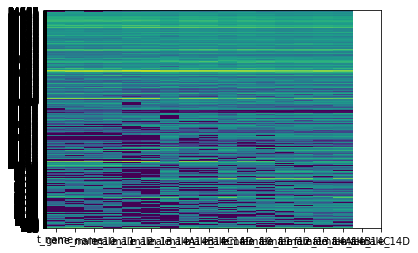

In [19]:
plt.pcolor(ordered_array)
plt.yticks(np.arange(0.5, len(logged.index), 1), logged.index)
plt.xticks(np.arange(0.5, len(logged.columns), 1), logged.columns)
plt.show()

In [20]:
#new attempt 
#make a dictionary for the rows that contains {row_position:number}
#reorder the rows by going through the leaves, then finding that value in the row_position and inserting
#that row in the new dataframe?

In [21]:
# plt.pcolor(cut_logged)
# plt.yticks(np.arange(0.5, len(logged.index), 1), logged.index)
# plt.xticks(np.arange(0.5, len(logged.columns), 1), logged.columns)
# plt.show()

In [22]:
#sns.heatmap(cut_logged)
# sns.heatmap(df)

In [23]:
#Change this
logged_transpose = logged.transpose()
logged_transposed = logged_transpose.astype(object)
 
#Create new DF from old DF
df= cut_logged
logged_transposed = logged_transpose.astype(object)
 
    


In [24]:
df=cut_logged
print(df)

         male_10   male_11   male_12    male_13   male_14A  male_14B  \
3       4.573651  3.593093  4.383186   3.772605   4.240476  4.749679   
8       3.472120 -3.321928 -3.321928  -3.321928   3.897757 -3.321928   
9       4.260622 -3.321928  3.900371   4.801878   4.484797  2.990301   
10      2.681610  2.012708  2.665469   6.130167   6.072718  2.945977   
11      6.899972  3.552258  6.909741   6.245611   6.188155  6.953605   
...          ...       ...       ...        ...        ...       ...   
34658   3.492078 -1.024012  2.117857   6.549579   6.448643  4.501407   
34663   5.063561  0.209330  3.312209   8.696872   6.681296  4.675181   
34665   4.661599 -0.437467  4.418274   9.014515   8.350559  5.778312   
34667  11.191931  5.095088  9.857502  12.271701  11.136488  9.213941   
34715   1.078063 -3.321928  3.016877   1.113834   1.696735 -3.321928   

        male_14C   male_14D  female_10  female_11  female_12  female_13  \
3       4.518529   3.558602   4.459054   3.809626   4.051558

In [25]:

# df=cut_logged #new df with cut_logged
# #print 
# #df.index=([bygene]) #Rearrange rows (aka genes) by  "bygene" index
# df=df.transpose()
# df.index=([bysample])
# df=df.transpose()
# print(df)
# sns.heatmap(df)

# plt.figure(figsize=(10,10))
# plt.imshow(df,cmap='hot')
# plt.show()

**create a dendrogram relating the sample to one another?
*Also, the data for the heat map still needs to be reorganized by the leaves_list categories

In [26]:
#male_10	male_11	male_12	male_13	male_14A	male_14B	male_14C	male_14D	female_10	female_11	female_12	female_13	female_14A	female_14B	female_14C	female_14D

#How would I combine male_14A and male_14B ??
#need to transpose the dataframe so gene expression is in the column
#need the rows to tell you 1) the sex 2) the stage 
#work with the cut_logged 
#make sure that cut_logged is only floats 


In [27]:
newframe = logged.transpose()
newframe

,3,8,9,10,11,12,13,16,37,41,...,34645,34646,34647,34649,34656,34658,34663,34665,34667,34715
t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078964,FBtr0336702,...,FBtr0100866,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114216
gene_name,CR40182,Parp,Alg-2,Tim17b,Tim17b,CG41128,CG41099,CG41099,CG12582,CG12582,...,mt:ATPase8,mt:ATPase6,mt:CoIII,mt:ND3,mt:ND5,mt:ND4,mt:Cyt-b,mt:ND1,mt:lrRNA,CR40679
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,3.46393,2.26279,...,-3.32193,5.82113,6.40385,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,1.07806
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,4.23906,0.793853,...,-3.32193,1.28175,2.13634,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,4.67025,0.97646,...,-3.32193,4.05956,5.46229,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,3.01688
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,4.08372,0.791827,...,-0.664672,3.60902,10.2568,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,1.11383
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,4.07881,1.28855,...,1.52549,6.89477,7.99489,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,1.69674
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,-3.32193,-3.32193,...,0.489144,6.12108,6.91031,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,3.48419,0.292786,...,0.705399,7.81442,8.48709,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,0.695194
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,-3.32193,-3.32193,...,-3.32193,7.52131,7.18584,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,3.2158


In [28]:
reindex_logged = logged.set_index("t_name").iloc[:,1:]
reindex_logged

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,
FBtr0302347,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
FBtr0113885,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
FBtr0301810,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
FBtr0113895,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
FBtr0345179,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0100879,3.492078,-1.024012,2.117857,6.549579,6.448643,4.501407,6.193772,5.823686,5.372933,-1.374355,4.490341,6.555514,8.073001,4.528337,5.029599,7.769718
FBtr0100884,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
FBtr0100886,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730


In [29]:
transposed_indexed = reindex_logged.transpose()
transposed_indexed

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078964,FBtr0336702,...,FBtr0100866,FBtr0100867,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114216
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,3.463929,2.262790,...,-3.321928,5.821133,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,1.078063
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,4.239056,0.793853,...,-3.321928,1.281747,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,4.670246,0.976460,...,-3.321928,4.059556,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,3.016877
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,4.083719,0.791827,...,-0.664672,3.609020,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,1.113834
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,4.078810,1.288547,...,1.525487,6.894772,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,1.696735
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,-3.321928,-3.321928,...,0.489144,6.121077,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,3.484193,0.292786,...,0.705399,7.814423,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,0.695194
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,-3.321928,-3.321928,...,-3.321928,7.521305,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,3.215803
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,4.533838,1.086382,...,-3.321928,7.634221,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,3.762950
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,3.095164,0.337087,...,-3.321928,1.140935,3.889324,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,0.904145


In [30]:
transposed_indexed["sex"] = [x.split("_")[0] for x in transposed_indexed.index]
transposed_indexed["stage"] = [x.split("_")[1][:2] for x in transposed_indexed.index]
transposed_indexed


t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078964,FBtr0336702,...,FBtr0100868,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114216,sex,stage
male_10,4.573651,3.472120,4.260622,2.681610,6.899972,2.705093,4.756461,3.146474,3.463929,2.262790,...,6.403850,-3.321928,2.776468,3.492078,5.063561,4.661599,11.191931,1.078063,male,10
male_11,3.593093,-3.321928,-3.321928,2.012708,3.552258,-3.321928,-3.321928,-3.321928,4.239056,0.793853,...,2.136340,-3.321928,-1.470133,-1.024012,0.209330,-0.437467,5.095088,-3.321928,male,11
male_12,4.383186,-3.321928,3.900371,2.665469,6.909741,3.387643,-3.321928,4.653752,4.670246,0.976460,...,5.462293,-3.321928,3.670053,2.117857,3.312209,4.418274,9.857502,3.016877,male,12
male_13,3.772605,-3.321928,4.801878,6.130167,6.245611,4.529754,4.852629,4.093288,4.083719,0.791827,...,10.256761,-3.321928,5.763758,6.549579,8.696872,9.014515,12.271701,1.113834,male,13
male_14A,4.240476,3.897757,4.484797,6.072718,6.188155,4.658374,4.892474,2.507524,4.078810,1.288547,...,7.994895,5.247958,5.726288,6.448643,6.681296,8.350559,11.136488,1.696735,male,14
male_14B,4.749679,-3.321928,2.990301,2.945977,6.953605,4.435483,-3.321928,-3.321928,-3.321928,-3.321928,...,6.910309,-3.321928,2.676730,4.501407,4.675181,5.778312,9.213941,-3.321928,male,14
male_14C,4.518529,4.145813,3.801070,6.230339,6.345793,5.110117,4.421782,-3.321928,3.484193,0.292786,...,8.487087,5.119850,5.723819,6.193772,6.166922,8.493319,11.283776,0.695194,male,14
male_14D,3.558602,3.436875,3.701063,5.750615,5.901059,4.143877,2.423376,3.733928,-3.321928,-3.321928,...,7.185842,4.603723,3.962273,5.823686,6.945737,7.797501,10.690080,3.215803,male,14
female_10,4.459054,-3.321928,4.222705,5.486961,5.602316,3.885497,4.157226,3.636828,4.533838,1.086382,...,9.376699,2.247168,3.427259,5.372933,6.905339,8.259794,11.332554,3.762950,female,10
female_11,3.809626,-3.321928,1.594158,4.081859,4.196805,2.035947,-3.321928,-3.321928,3.095164,0.337087,...,3.889324,-3.321928,-0.163229,-1.374355,-0.371506,1.172241,6.260317,0.904145,female,11


In [31]:
# independent variable = stage (denoted in the "stage column")
# depenednt variable = gene expression 

new_list = transposed_indexed.columns[:-2]

beta = []
pvalue = []
sex_beta = []
sex_pvalue = []

for x in new_list:
    model = smf.ols(formula = "{} ~ stage".format(x), data = transposed_indexed)
    model2 = smf.ols(formula = "{} ~ stage".format(x), data = transposed_indexed)
    results = model.fit()
    beta.append(results.params[1])
    pvalue.append(results.pvalues[1])
    
    
beta
pvalue

        

[0.05984571618552835,
 0.38432511906019795,
 0.0015142003086619537,
 0.45581518164154256,
 0.0019146596501840617,
 0.010587736482943632,
 0.06758722665819245,
 0.09792765788050653,
 0.913759972145199,
 0.5841049499529234,
 0.4214432730763028,
 0.9212894684086378,
 0.6116214535815016,
 0.8038515684191918,
 0.2932244998389565,
 0.9420703858147423,
 0.2413569766116048,
 0.012050601120455372,
 0.07883602823606203,
 0.02235832623668289,
 0.019476801022809423,
 0.010081487765108178,
 0.9999999999999984,
 0.9592377028187653,
 0.9833003062835135,
 0.4443186508990754,
 0.5635662855295183,
 0.5701155752279639,
 0.5089485306207104,
 0.640742242890961,
 0.8990946094110713,
 0.6209398073828853,
 0.1972923501820507,
 0.014885726873572556,
 0.5215312602551967,
 0.8402448758909353,
 0.45038395412550125,
 0.9086817462635116,
 0.22151459549232333,
 0.22451524750797974,
 0.3003733912634247,
 0.9870576365017075,
 0.8154340765089584,
 0.4066799505543933,
 0.9430049674072674,
 0.528597013953504,
 0.04348064

In [32]:
results.summary()

# take p value from the 2nd item 
# beta value is the coef


/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FBtr0114216   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.346
Date:                Sat, 19 Dec 2020   Prob (F-statistic):              0.314
Time:                        23:39:55   Log-Likelihood:                -30.625
No. Observations:                  16   AIC:                             71.25
Df Residuals:                      11   BIC:                             75.11
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4205      1.399      1.730      0.112      -0.659       5.500
stage[T.11]    -3.6294      1.979     -1.834      0.094      -7.985       0.726
stage[T.12]     0.2118      1.979      0.107      0.917      -4.143       4.567
stage[T.13]    -0.4493      1.979     -0.227      0.825      -4.805       3.906
stage[T.14]    -1.6226      1.564     -1.037      0.322      -5.066       1.821
==============================================================================
Omnibus:                        2.894   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.295
Skew:                          -0.676   Prob(JB):                        0.523
Kurtosis:                       3.341   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

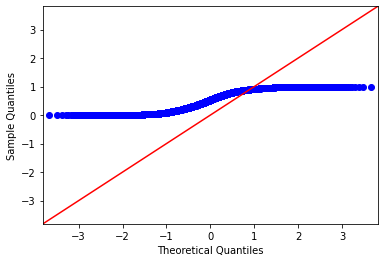

In [33]:
data_points = cut_logged     
fig, ax = plt.subplots() 
ax.set_ylim(-3,3)
sm.qqplot(np.array(pvalue), ax = ax, line = "45") 
plt.show() 

In [34]:
binary,value = stats.multitest.fdrcorrection(pvalue, alpha=0.1)
print(len(binary))
print(len(value))



8155
8155


In [35]:
# Report the list of genes that exhibit differential expression by stage at a 10% false discovery rate.
#Iterate through binary, if true, pull out the gene name from list above?
trues = []

for b,n in zip(binary, new_list):
    if b == True:
        trues.append(n)
    
print(len(trues))
    

122


In [36]:
new_list = transposed_indexed.columns[:-2]

sex_beta = []
sex_pvalue = []

for x in new_list:
    model2 = smf.ols(formula = "{} ~ stage + sex".format(x), data = transposed_indexed)
    results = model2.fit()
    sex_beta.append(results.params[1])
    sex_pvalue.append(results.pvalues[1])  
    
sex_beta
sex_pvalue



[0.07335631022992647,
 0.4030547889018945,
 0.001764685407973555,
 0.38666614845906966,
 0.0017267987201947167,
 0.009018112554547894,
 0.08091766012180282,
 0.11251225406457716,
 0.9179424251935185,
 0.6023492938683408,
 0.4322562804537631,
 0.9145068163223666,
 0.6191526401172066,
 0.8126877090744383,
 0.316544770254642,
 0.9398266756251062,
 0.2333960179882336,
 0.016871402441494127,
 0.07836121820166148,
 0.022583779970666046,
 0.020285987648854004,
 0.012590028043126296,
 0.9999999999999976,
 0.9612208252212625,
 0.984112645167887,
 0.46673458228678677,
 0.5711671953717338,
 0.5890017689760059,
 0.5262221942072716,
 0.6397973705155984,
 0.8972074481837862,
 0.5829405381609405,
 0.21191694549474746,
 0.01802915243713709,
 0.5295586654683588,
 0.8441753891509676,
 0.43660166741257045,
 0.9121202935990457,
 0.24469664477107966,
 0.2477376510943728,
 0.32450803942916506,
 0.9876446008904742,
 0.8242690793252354,
 0.42920489296643405,
 0.9441541290710662,
 0.5485616227732822,
 0.050397

In [37]:
# Repeat the analysis while controlling for sex.
# Report the list of genes that exhibit differential 
# expression by stage at a 10% false discovery rate 
# while controlling for sex.

binary,value = stats.multitest.fdrcorrection(sex_pvalue, alpha=0.1)
print(len(binary))
print(len(value))

trues2 = []

for b,n in zip(binary, new_list):
    if b == True:
        trues2.append(n)
    
print(trues2)


8155
8155
['FBtr0078876', 'FBtr0078728', 'FBtr0081625', 'FBtr0337072', 'FBtr0081951', 'FBtr0082347', 'FBtr0347305', 'FBtr0302550', 'FBtr0083223', 'FBtr0336472', 'FBtr0083619', 'FBtr0336471', 'FBtr0083566', 'FBtr0083568', 'FBtr0301007', 'FBtr0344359', 'FBtr0346349', 'FBtr0084863', 'FBtr0084934', 'FBtr0084980', 'FBtr0072583', 'FBtr0072872', 'FBtr0332138', 'FBtr0332055', 'FBtr0075873', 'FBtr0075863', 'FBtr0075823', 'FBtr0075648', 'FBtr0346644', 'FBtr0075200', 'FBtr0075101', 'FBtr0075112', 'FBtr0299563', 'FBtr0074902', 'FBtr0089798', 'FBtr0111146', 'FBtr0113739', 'FBtr0301784', 'FBtr0301783', 'FBtr0113841', 'FBtr0333870', 'FBtr0333872', 'FBtr0113715', 'FBtr0113825', 'FBtr0344972', 'FBtr0302409', 'FBtr0334986', 'FBtr0111266', 'FBtr0111280', 'FBtr0086086', 'FBtr0345019', 'FBtr0088388', 'FBtr0088412', 'FBtr0088418', 'FBtr0088363', 'FBtr0304676', 'FBtr0087694', 'FBtr0087005', 'FBtr0345418', 'FBtr0086945', 'FBtr0086897', 'FBtr0071747', 'FBtr0301269', 'FBtr0112406', 'FBtr0070115', 'FBtr0070683',

In [38]:
# Compare the lists–what is the percentage overlap with 
#and without sex as a covariate?
# Generate a volcano plot of the differential expression, 
#with sex as a covariate, results ( -log10(p-value) on the y-axis, 
#beta on the x axis). Color the significant points in a different color.

In [39]:
#Find what percent of genes in trues match trues2 ?
#((# overlapping genes) / (# genes in list without covariate)) * 100


In [48]:
master = []
for gene2 in trues2:
    mylist = []
    for gene in trues:
         if gene == gene2:
             mylist.append(gene2)
            
    master.append(mylist)
    
percentoverlap = (len(master) / len(trues)) * 100

print(len(trues))
print(len(master))
print(percentoverlap)


122
104
85.24590163934425


In [41]:
#Generate a volcano plot of the differential expression, 
#with sex as a covariate, results ( -log10(p-value) 
#on the y-axis, beta on the x axis).
# Use trues2 to get the gene name from sex_pvalue
# Use trues to get the gene name from p_value

In [51]:
 df = pd.DataFrame(sex_pvalue,columns=['Column_Name'])

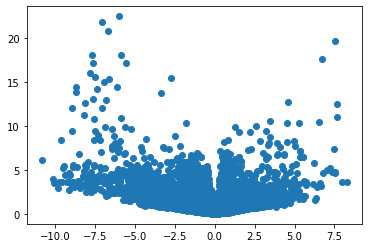

In [59]:
#volcano plot 
x = sex_beta
y = -(np.log(sex_pvalue))

plt.scatter(x,y,)

ModuleNotFoundError: No module named 'bioinfokit'